In [1]:
# imports
import numpy as np 
import matplotlib.pyplot as plt
import os
# %matplotlib inline
import analysis as ana

In [2]:
# getArrayTraj 
def getArrayTraj(toFind):
    trajs=[]
    Path = "/Users/mohod/Developer/OTsim/otsim_data/"
    folders  = os.listdir(Path)
    for id in toFind:
        for folder in folders:
            if(folder[0] != "."):
                files=""
                try:
                    files = os.listdir(Path+folder+"/data/")
                    # print(Path+folder+"/data/")
                except Exception:
                    # print(Exception)
                    pass
                for file in files:
                    # print(Path+folder+"/data/")
                    filename = file.split("_")
                    # print(filename[-1])
                    uuid = int(filename[-1].split(".")[0])
                    # print(uuid)
                    if uuid == id:
                        trajs.append([file,ana.expand_trajectory(np.load(Path+folder+"/data/"+file))])
    return trajs

In [3]:
# getArrayRadius
def getArrayRadius(allTraj):
    ans = []
    sds = []
    # print(allTraj[1][1,:].shape)
    for traj in allTraj:
        # print(traj[0])
        radius, sd = ana.getRadius(traj[1])
        ans.append(radius)
        sds.append(sd)
    return ans,sds
def getArrayFrequency(allTraj):
    ans = []
    for traj in allTraj:
        ans.append(ana.getfreq(traj[1][:,0]))
    return np.abs(ans)
        

10 10


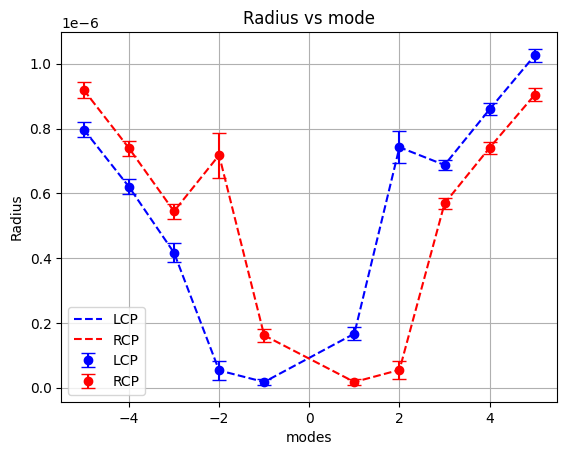

In [9]:
modes = [-5,-4,-3,-2,-1,1,2,3,4,5]
LCP_modeVar = getArrayTraj([3080017,4099843,3864095,6705893,2789572,2322232,5118391,1544562,6897390,5357862])
RCP_modeVar = getArrayTraj([6491602,4061540,6244212,2548265,1762004,7167251,9785005,6558493,5600605,4317625])

print(len(LCP_modeVar),len(RCP_modeVar))

lcp_radius,lcp_sd = getArrayRadius(LCP_modeVar)
rcp_radius,rcp_sd = getArrayRadius(RCP_modeVar)

plt.errorbar(modes,lcp_radius,fmt="o", label ="LCP", color="blue" ,yerr=lcp_sd,capsize=5)
plt.errorbar(modes,rcp_radius, fmt="o",label ="RCP",color="red", yerr=rcp_sd,capsize=5)
plt.plot(modes,lcp_radius,"--", label ="LCP",color="blue")
plt.plot(modes,rcp_radius,"--", label ="RCP",color="red")
plt.legend()
plt.title("Radius vs mode")
plt.ylabel("Radius")
plt.xlabel("modes")
plt.grid()





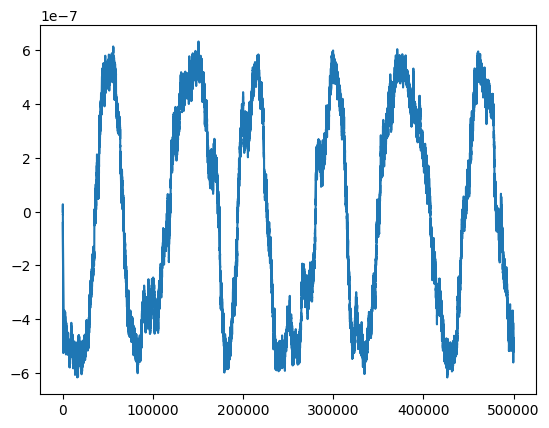

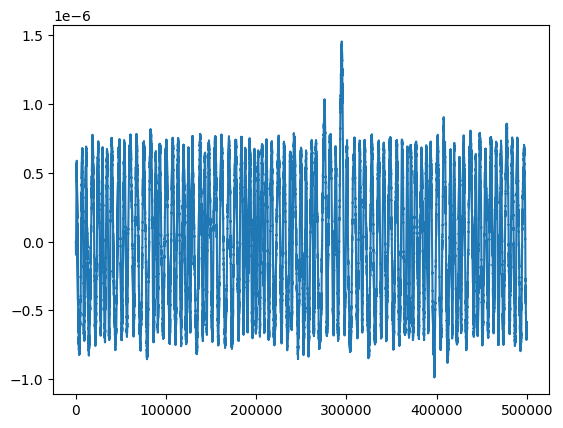

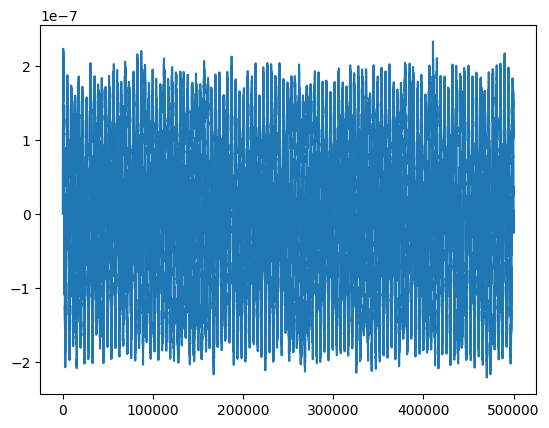

In [19]:
# print(RCP_modeVar[2][0])
# print(RCP_modeVar[1][0])
plt.plot(RCP_modeVar[2][1][:,0])
plt.figure()
plt.plot(RCP_modeVar[3][1][:,0])
plt.figure()
plt.plot(RCP_modeVar[4][1][:,0])

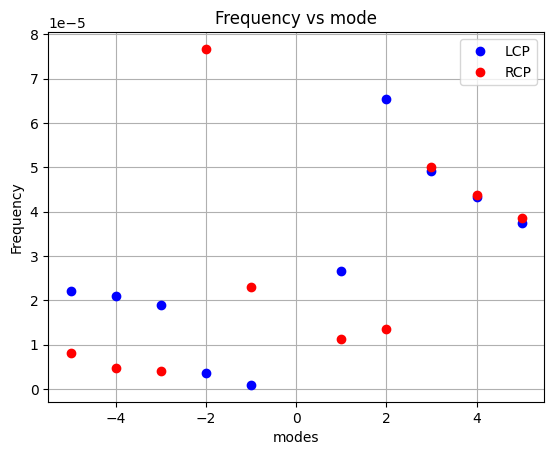

In [5]:
lcp_freq = getArrayFrequency(LCP_modeVar)*2*np.pi*lcp_radius
rcp_freq = getArrayFrequency(RCP_modeVar)*2*np.pi*rcp_radius
plt.plot(modes,lcp_freq,"o", label ="LCP",color="blue")
plt.plot(modes,rcp_freq,"o", label ="RCP",color="red")
plt.legend()
plt.title("Frequency vs mode")
plt.ylabel("Frequency")
plt.xlabel("modes")
plt.grid()

<Figure size 640x480 with 0 Axes>

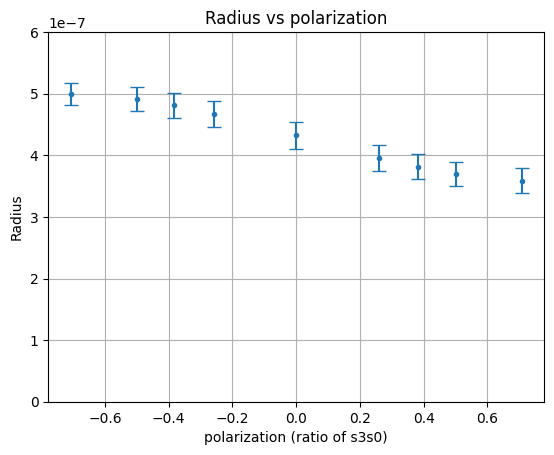

<Figure size 640x480 with 0 Axes>

In [6]:

polVar_2 = getArrayTraj([2698496,6544515,2966653,7005554,7188528,9505016,2682020,1819638,2380057])
real_2 = np.ones(len(polVar_2))
im_2 =np.array([-45,-30,-90,30,45,90,60,-60,0])
im_2 =  np.exp(-1j*im_2*(np.pi/180)) 
phi_2 = np.angle(real_2+im_2)
s3s0_2 = np.sin(-1*phi_2)



radius_2,sd_2 = getArrayRadius(polVar_2)


plt.errorbar(s3s0_2,radius_2,fmt="." ,yerr=sd_2,capsize=5)
# plt.plot(s3s0_2,radius_2,"o")
plt.title("Radius vs polarization")
plt.ylabel("Radius")
plt.xlabel("polarization (ratio of s3s0)")
plt.grid()
plt.ylim(0,6e-7)

plt.figure()


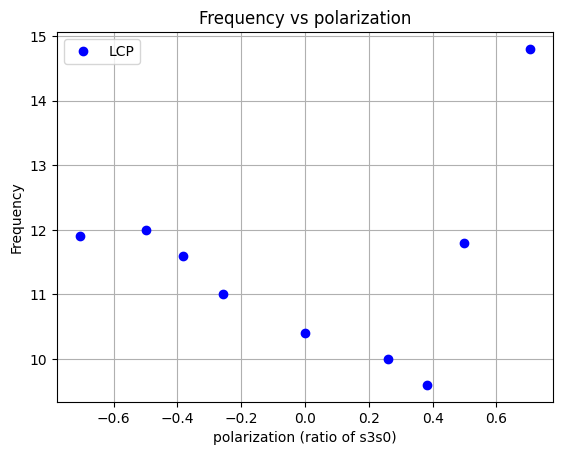

In [7]:

polVar_2 = getArrayTraj([2698496,6544515,2966653,7005554,7188528,9505016,2682020,1819638,2380057])
real_2 = np.ones(len(polVar_2))
im_2 =np.array([-45,-30,-90,30,45,90,60,-60,0])
im_2 =  np.exp(-1j*im_2*(np.pi/180)) 
phi_2 = np.angle(real_2+im_2)
s3s0_2 = np.sin(-1*phi_2)




radius_2,sd_2 = getArrayRadius(polVar_2)


pol_freq = getArrayFrequency(polVar_2)

plt.plot(s3s0_2,pol_freq,"o", label ="LCP",color="blue")
plt.legend()
plt.title("Frequency vs polarization")
plt.ylabel("Frequency")
plt.xlabel("polarization (ratio of s3s0)")
plt.grid()